# Week 11: Sentiment Analysis, Part 2: Plotting Curves with Rolling Averages

This week, our questions and concepts are robust, but the amount of new code to learn is modest :)

Our focus is on plotting "sentiment curves." We will:
* Plot the raw values for sentiment in *The Sign of the Four*
* Calculate rolling averages, plot them, and investigate the portions of the text at which the minimum and maximum points occur

# Getting started

First, let's import our libraries, set our Pandas display options, and reload the data produced during last week's lecture (handily stored in a CSV that lives in the same folder as this notebook).

In [119]:
import pandas as pd
from textblob import TextBlob

In [120]:
pd.set_option('display.max_colwidth', 0)

In [121]:
sot4_sentence_sentiment_df = pd.read_csv("sot4_sentence_sentiment.csv")
sot4_sentence_sentiment_df[:15]

,sentence,polarity,subjectivity
0,Chapter I The Science of Deduction Sherlock Holmes took his bottle from the corner of the mantel-piece and his hypodermic syringe from its neat morocco case,0.000000,0.000000
1,With his long white nervous fingers he adjusted the delicate needle and rolled back his left shirt-cuff,-0.070000,0.260000
2,For some little time his eyes rested thoughtfully upon the sinewy forearm and wrist all dotted and scarred with innumerable puncture-marks,0.106250,0.500000
3,Finally he thrust the sharp point home pressed down the tiny piston and sank back into the velvet-lined arm-chair with a long sigh of satisfaction,-0.055093,0.489815
4,Three times a day for many months I had witnessed this performance but custom had not reconciled my mind to it,0.500000,0.500000
5,On the contrary from day to day I had become more irritable at the sight and my conscience swelled nightly within me at the thought that I had lacked the courage to protest,0.500000,0.500000
6,Again and again I had registered a vow that I should deliver my soul upon the subject but there was that in the cool nonchalant air of my companion which made him the last man with whom one would care to take anything approaching to a liberty,0.045833,0.262500
7,His great powers his masterly manner and the experience which I had had of his many extraordinary qualities all made me diffident and backward in crossing him,0.358333,0.762500
8,Yet upon that afternoon whether it was the Beaune which I had taken with my lunch or the additional exasperation produced by the extreme deliberation of his manner I suddenly felt that I could hold out no longer,-0.062500,0.750000
9,“ Which is it to-day ” I asked — “ morphine or cocaine ” He raised his eyes languidly from the old black-letter volume which he had opened,0.100000,0.200000


Now let's run the command we ended last lecture with, plotting the "raw" sentiment polarity values for every sentence in *The Sign of the Four*. Can we learn much from this?

<AxesSubplot:>

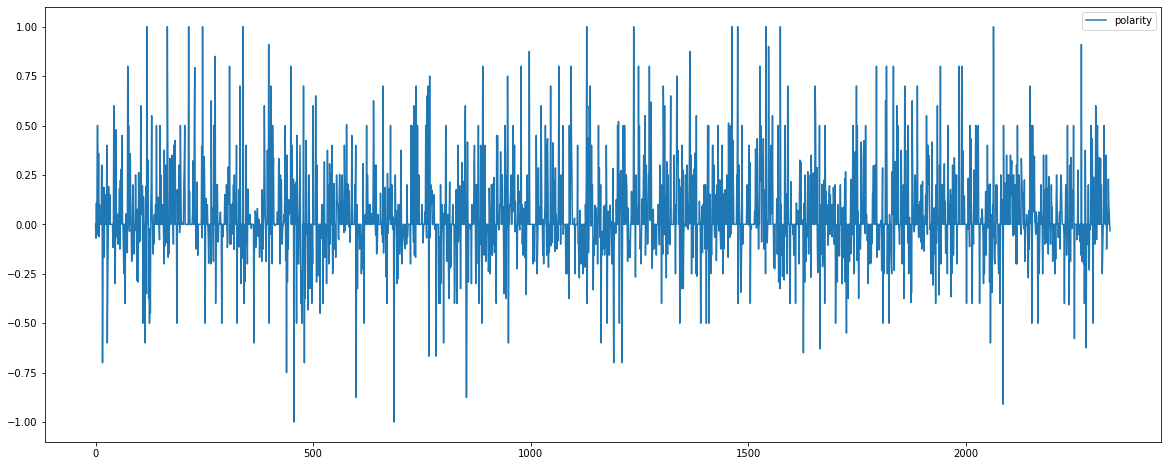

In [122]:
sot4_sentence_sentiment_df[['polarity']].plot(figsize=(20,8))

# OK, so that's a first attempt at making this chart into something readable. What if we consider the Kurt Vonnegut chart Karl showed us as a starting point?

## Cinderella 
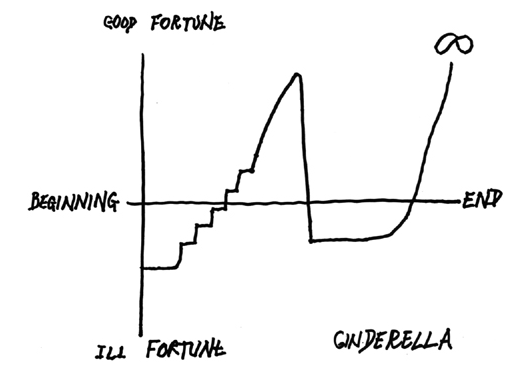

## Boy Meet Girl
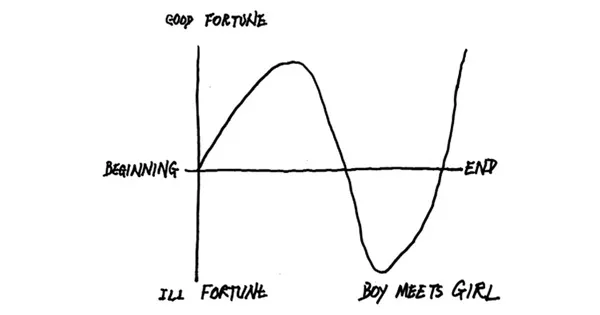







## Some questions for you and the person next to ya:

1. This chart uses the variable "fortune" in its y-axis. Is fortune the same as "sentiment"? What exactly do these things mean, and how do they differ? 
2. Vonnegut's charts seem easier to interpret than the chart that we just generated with Pandas. What would make this chart more intepretable? Can you imagine an ideal version of this chart for literary analysis? 

# Rolling Averages in Pandas

A **rolling average** will let us make the chart a little smoother and interpretable.

Pandas is basically built to do things like calculate rolling averages. It makes it really easy, which is awesome. All we need to do is specify:
- What part of the DataFrame we're interested in (here, the `polarity` column)
- That we want to do a rolling... something or other (the `.rolling()` method)... and that we want our rolling window size to be (here it's 10, indicated with the `window=10` agument) and that we want these rolling averages to be "centred" — which you'll understand if you were in lecture 😊 and which is explained in Mary's lecture (the `centered=True` argument)
- That the "something or other" we want are rolling **averages (or means)** (indicated with the `.mean()` method)

In [123]:
sot4_sentence_sentiment_df['polarity'].rolling(window=10, center=True).mean()

0      NaN      
1      NaN      
2      NaN      
3      NaN      
4      NaN      
        ..      
2328    0.060625
2329   NaN      
2330   NaN      
2331   NaN      
2332   NaN      
Name: polarity, Length: 2333, dtype: float64

It would be a lot handier if that were a column in our DataFrame — so let's put that data there!

In [124]:
sot4_sentence_sentiment_df['rolling_10_polarity'] = sot4_sentence_sentiment_df['polarity'].rolling(window=10, center=True).mean()

In [125]:
sot4_sentence_sentiment_df[:15]

,sentence,polarity,subjectivity,rolling_10_polarity
0,Chapter I The Science of Deduction Sherlock Holmes took his bottle from the corner of the mantel-piece and his hypodermic syringe from its neat morocco case,0.000000,0.000000,NaN
1,With his long white nervous fingers he adjusted the delicate needle and rolled back his left shirt-cuff,-0.070000,0.260000,NaN
2,For some little time his eyes rested thoughtfully upon the sinewy forearm and wrist all dotted and scarred with innumerable puncture-marks,0.106250,0.500000,NaN
3,Finally he thrust the sharp point home pressed down the tiny piston and sank back into the velvet-lined arm-chair with a long sigh of satisfaction,-0.055093,0.489815,NaN
4,Three times a day for many months I had witnessed this performance but custom had not reconciled my mind to it,0.500000,0.500000,NaN
5,On the contrary from day to day I had become more irritable at the sight and my conscience swelled nightly within me at the thought that I had lacked the courage to protest,0.500000,0.500000,0.142282
6,Again and again I had registered a vow that I should deliver my soul upon the subject but there was that in the cool nonchalant air of my companion which made him the last man with whom one would care to take anything approaching to a liberty,0.045833,0.262500,0.142282
7,His great powers his masterly manner and the experience which I had had of his many extraordinary qualities all made me diffident and backward in crossing him,0.358333,0.762500,0.149282
8,Yet upon that afternoon whether it was the Beaune which I had taken with my lunch or the additional exasperation produced by the extreme deliberation of his manner I suddenly felt that I could hold out no longer,-0.062500,0.750000,0.138657
9,“ Which is it to-day ” I asked — “ morphine or cocaine ” He raised his eyes languidly from the old black-letter volume which he had opened,0.100000,0.200000,0.144167


Now all we need to do is to plot our new column! 

Does that look any better?

<AxesSubplot:>

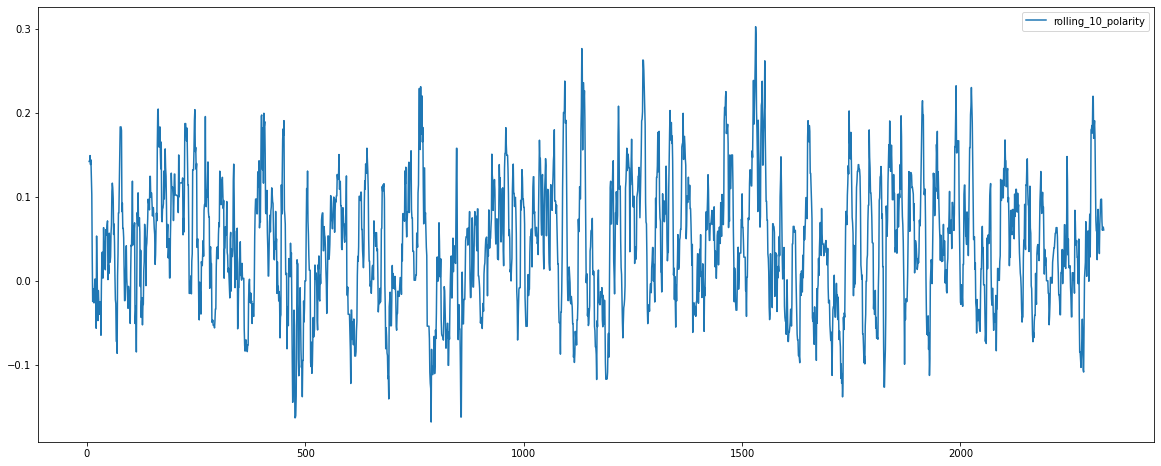

In [126]:
sot4_sentence_sentiment_df[['rolling_10_polarity']].plot(figsize=(20,8))

<AxesSubplot:>

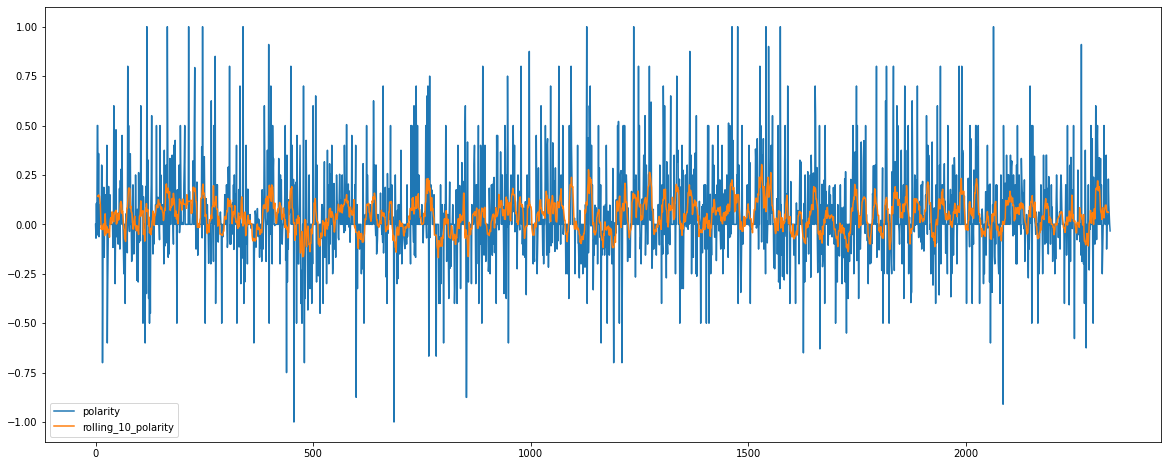

In [127]:
sot4_sentence_sentiment_df[['polarity','rolling_10_polarity']].plot(figsize=(20,8))

Let's try some other window sizes: 25, 50, and 100. (You can try others, too!)

In [128]:
sot4_sentence_sentiment_df['rolling_25_polarity'] = sot4_sentence_sentiment_df['polarity'].rolling(window=25, center=True).mean()

<AxesSubplot:>

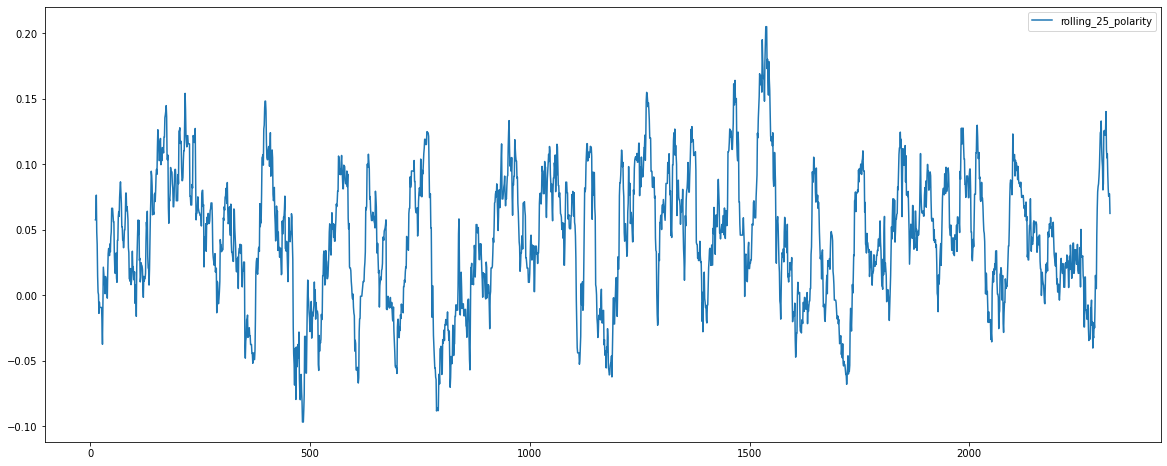

In [129]:
sot4_sentence_sentiment_df[['rolling_25_polarity']].plot(figsize=(20,8))

<AxesSubplot:>

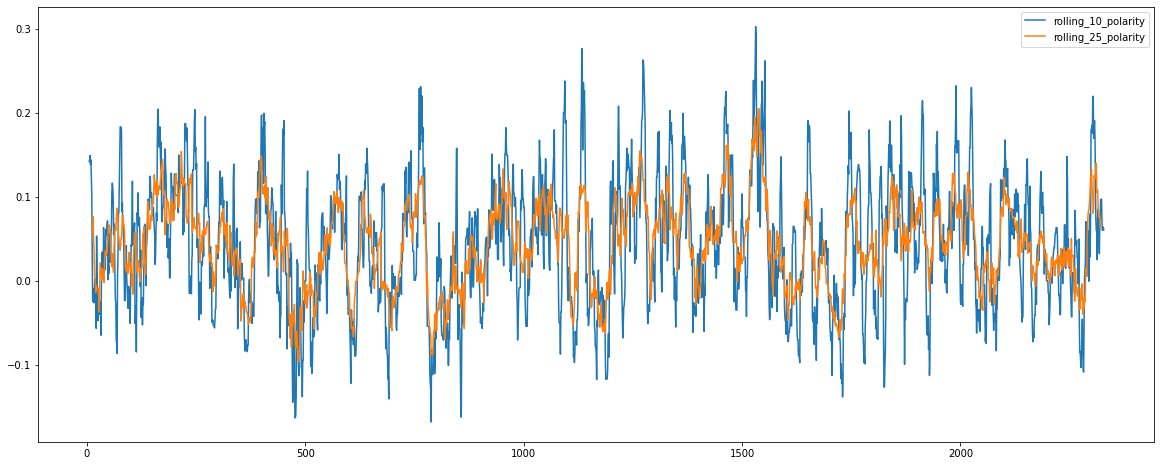

In [130]:
sot4_sentence_sentiment_df[['rolling_10_polarity','rolling_25_polarity']].plot(figsize=(20,8))

In [131]:
sot4_sentence_sentiment_df['rolling_50_polarity'] = sot4_sentence_sentiment_df['polarity'].rolling(window=50, center=True).mean()

<AxesSubplot:>

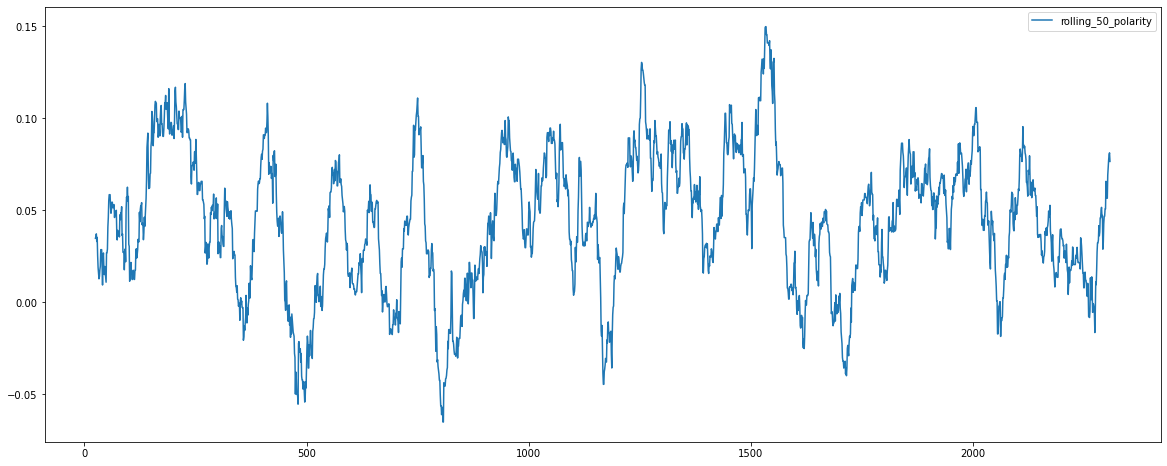

In [132]:
sot4_sentence_sentiment_df[['rolling_50_polarity']].plot(figsize=(20,8))

<AxesSubplot:>

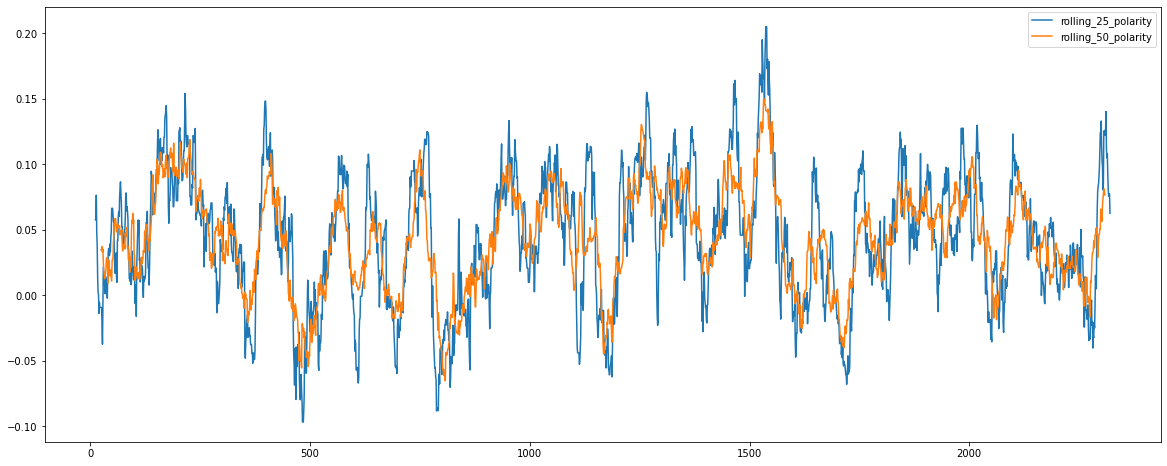

In [133]:
sot4_sentence_sentiment_df[['rolling_25_polarity','rolling_50_polarity']].plot(figsize=(20,8))

In [134]:
sot4_sentence_sentiment_df['rolling_100_polarity'] = sot4_sentence_sentiment_df['polarity'].rolling(window=100, center=True).mean()

<AxesSubplot:>

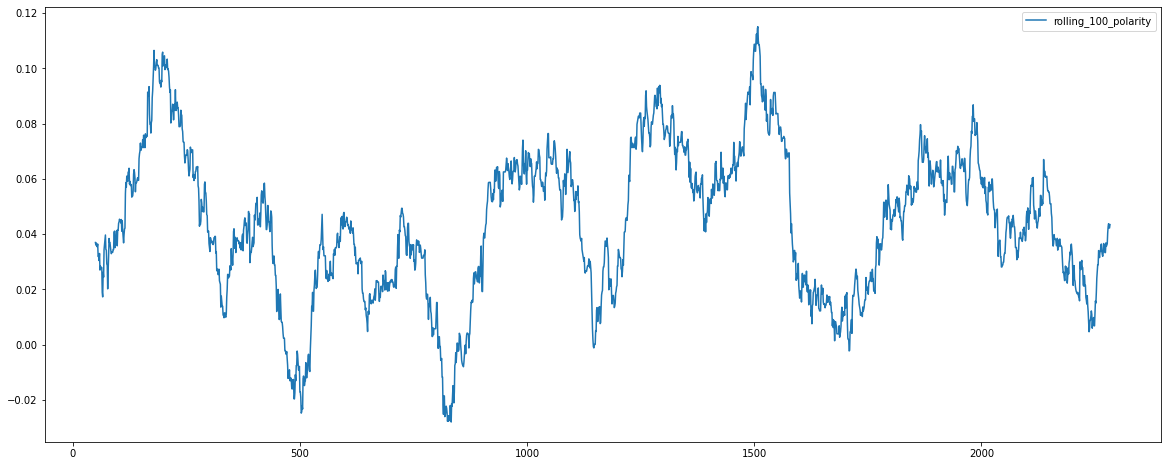

In [135]:
sot4_sentence_sentiment_df[['rolling_100_polarity']].plot(figsize=(20,8))

<AxesSubplot:>

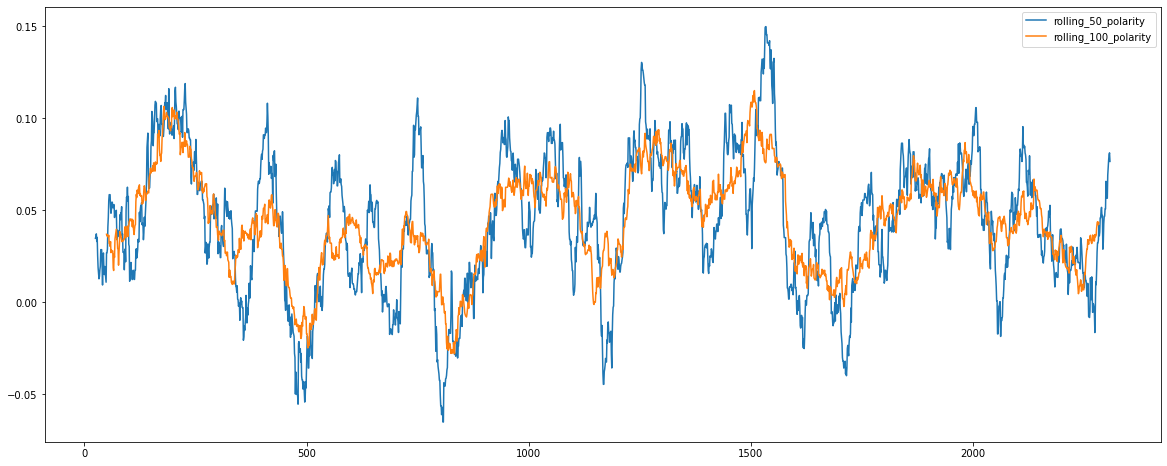

In [136]:
sot4_sentence_sentiment_df[['rolling_50_polarity','rolling_100_polarity']].plot(figsize=(20,8))

<AxesSubplot:>

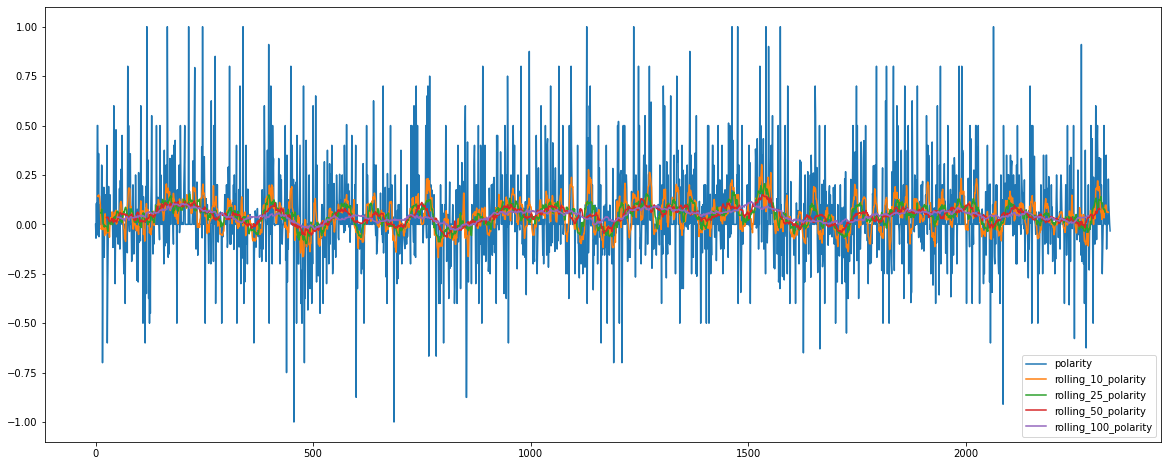

In [137]:
sot4_sentence_sentiment_df[['polarity','rolling_10_polarity','rolling_25_polarity','rolling_50_polarity','rolling_100_polarity']].plot(figsize=(20,8))

## Mary will now show us a deeper dive into just what a rolling average really is...

# Finding the Maximum and Minimum Points

Why might we want to look at the minimum and maximum points?

***Let's describe each of these to help us keep track***

In [138]:
sot4_sentence_sentiment_df[sot4_sentence_sentiment_df['rolling_50_polarity']==sot4_sentence_sentiment_df['rolling_50_polarity'].min()]

,sentence,polarity,subjectivity,rolling_10_polarity,rolling_25_polarity,rolling_50_polarity,rolling_100_polarity
807,“ My dear Watson try a little analysis yourself ” said he with a touch of impatience,-0.1875,0.5,0.047222,-0.022454,-0.065088,0.002841
808,“ You know my methods,0.0000,0.0,0.009722,-0.022454,-0.065088,-0.000701


In [139]:
#Finds the minimum sentiment in the rolling_50_polarity sentiment

sot4_sentence_sentiment_df['rolling_50_polarity'].min()

-0.06508789682539683

In [140]:
#min_polarity_50 is the minimum sentiment in the rolling_50_polarity sentiment

min_polarity_50 = sot4_sentence_sentiment_df['rolling_50_polarity'].min()

In [141]:
#This is the list of true false values representing whether or not the min polarity for rolling average of 50,
#is at that particular row in the data

sot4_sentence_sentiment_df['rolling_50_polarity'] == min_polarity_50

0       False
1       False
2       False
3       False
4       False
        ...  
2328    False
2329    False
2330    False
2331    False
2332    False
Name: rolling_50_polarity, Length: 2333, dtype: bool

In [142]:
#has_min_polarity_50 is the list of true false values representing whether or not the min polarity for rolling average of 50,
#is at that particular row in the data

has_min_polarity_50 = sot4_sentence_sentiment_df['rolling_50_polarity'] == min_polarity_50

In [143]:
#Using the has_min_polarity_50 filter to get the minimum points for the rolling 50 polarity

sot4_sentence_sentiment_df[has_min_polarity_50]

,sentence,polarity,subjectivity,rolling_10_polarity,rolling_25_polarity,rolling_50_polarity,rolling_100_polarity
807,“ My dear Watson try a little analysis yourself ” said he with a touch of impatience,-0.1875,0.5,0.047222,-0.022454,-0.065088,0.002841
808,“ You know my methods,0.0000,0.0,0.009722,-0.022454,-0.065088,-0.000701


In [144]:
sot4_sentence_sentiment_df[sot4_sentence_sentiment_df['rolling_10_polarity']==sot4_sentence_sentiment_df['rolling_10_polarity'].min()]

,sentence,polarity,subjectivity,rolling_10_polarity,rolling_25_polarity,rolling_50_polarity,rolling_100_polarity
788,He must have done so,0.0,0.0,-0.168472,-0.088194,-0.004455,0.012069


In [145]:
sot4_sentence_sentiment_df[sot4_sentence_sentiment_df['rolling_25_polarity']==sot4_sentence_sentiment_df['rolling_25_polarity'].min()]

,sentence,polarity,subjectivity,rolling_10_polarity,rolling_25_polarity,rolling_50_polarity,rolling_100_polarity
483,I alone knew it,0.000,0.0,0.020000,-0.096667,-0.021381,-0.016085
484,When in India he and I through a remarkable chain of circumstances came into possession of a considerable treasure,0.425,0.6,-0.093333,-0.096667,-0.027214,-0.012835
485,I brought it over to England and on the night of Morstan ’ s arrival he came straight over here to claim his share,0.200,0.4,-0.113333,-0.096667,-0.025214,-0.012960


In [146]:
sot4_sentence_sentiment_df[sot4_sentence_sentiment_df['rolling_50_polarity']==sot4_sentence_sentiment_df['rolling_50_polarity'].min()]

,sentence,polarity,subjectivity,rolling_10_polarity,rolling_25_polarity,rolling_50_polarity,rolling_100_polarity
807,“ My dear Watson try a little analysis yourself ” said he with a touch of impatience,-0.1875,0.5,0.047222,-0.022454,-0.065088,0.002841
808,“ You know my methods,0.0000,0.0,0.009722,-0.022454,-0.065088,-0.000701


In [147]:
sot4_sentence_sentiment_df[sot4_sentence_sentiment_df['rolling_100_polarity']==sot4_sentence_sentiment_df['rolling_100_polarity'].min()]

,sentence,polarity,subjectivity,rolling_10_polarity,rolling_25_polarity,rolling_50_polarity,rolling_100_polarity
833,Now examine the thorn ” I took it up gingerly and held it in the light of the lantern,0.4,0.7,0.019143,-0.00726,-0.028322,-0.028018


Let's have a look now at the *maximum* points...

In [148]:
sot4_sentence_sentiment_df[sot4_sentence_sentiment_df['rolling_10_polarity']==sot4_sentence_sentiment_df['rolling_10_polarity'].max()]

,sentence,polarity,subjectivity,rolling_10_polarity,rolling_25_polarity,rolling_50_polarity,rolling_100_polarity
1531,I think that it would be a pleasure to my friend here to take the box round to the young lady to whom half of it rightfully belongs,-0.088889,0.322222,0.302956,0.168499,0.138285,0.07644


In [149]:
sot4_sentence_sentiment_df[sot4_sentence_sentiment_df['rolling_25_polarity']==sot4_sentence_sentiment_df['rolling_25_polarity'].max()]

,sentence,polarity,subjectivity,rolling_10_polarity,rolling_25_polarity,rolling_50_polarity,rolling_100_polarity
1537,I should much like to have a few details about this matter from the lips of Jonathan Small himself,-0.083333,0.233333,0.191429,0.20502,0.14091,0.083701
1538,You know I like to work the detail of my cases out,0.000000,0.000000,0.156429,0.20502,0.14091,0.083535
1539,There is no objection to my having an unofficial interview with him either here in my rooms or elsewhere as long as he is efficiently guarded ” “ Well you are master of the situation,0.175000,0.500000,0.138095,0.20502,0.14091,0.083910


In [150]:
sot4_sentence_sentiment_df[sot4_sentence_sentiment_df['rolling_50_polarity']==sot4_sentence_sentiment_df['rolling_50_polarity'].max()]

,sentence,polarity,subjectivity,rolling_10_polarity,rolling_25_polarity,rolling_50_polarity,rolling_100_polarity
1533,“ However the whole thing is irregular and I suppose we must wink at it,0.200000,0.400000,0.202123,0.165499,0.149785,0.075778
1534,The treasure must afterwards be handed over to the authorities until after the official investigation ” “ Certainly,0.214286,0.571429,0.180040,0.148166,0.149785,0.076410


In [151]:
sot4_sentence_sentiment_df[sot4_sentence_sentiment_df['rolling_100_polarity']==sot4_sentence_sentiment_df['rolling_100_polarity'].max()]

,sentence,polarity,subjectivity,rolling_10_polarity,rolling_25_polarity,rolling_50_polarity,rolling_100_polarity
1508,Jones and I resumed our cigars and our talk,0.0,0.0,-0.011875,0.053617,0.0728,0.115052


# Investigating the Extremes 

Let's have a look at the 50-sentence window that the `rolling_50_polarity` score indicates are the most negative and most positive, and see if seems like it's on to something...

(Yeah, that's right, I'm just taking the min and max points, then manually adding and subtracting 25 to make a 50-sentence window! The minimum window is centred at 807 and the maximum at 1533.)

In [155]:
sot4_sentence_sentiment_df[782:832].sort_values(by='rolling_50_polarity', ascending=True)

,sentence,polarity,subjectivity,rolling_10_polarity,rolling_25_polarity,rolling_50_polarity,rolling_100_polarity
807,“ My dear Watson try a little analysis yourself ” said he with a touch of impatience,-0.187500,0.500000,0.047222,-0.022454,-0.065088,0.002841
808,“ You know my methods,0.000000,0.000000,0.009722,-0.022454,-0.065088,-0.000701
804,My memory failed me or I should have been able to foretell it,0.000000,0.462500,-0.000375,-0.033954,-0.061088,-0.001326
805,There is nothing more to be learned here,0.500000,0.500000,0.004139,-0.026454,-0.057588,-0.001326
806,Let us go down ” “ What is your theory then as to those footmarks ” I asked eagerly when we had regained the lower room once more,0.172222,0.394444,0.069139,-0.034454,-0.057088,0.002841
803,“ I was staggered for the moment ” he said “ but the thing is quite natural,0.100000,0.400000,-0.000375,-0.036454,-0.056255,0.006487
802,“ Holmes ” I said in a whisper “ a child has done the horrid thing ” He had recovered his self-possession in an instant,0.000000,0.666667,0.028375,-0.033801,-0.056255,0.015237
801,The floor was covered thickly with the prints of a naked foot —clear well defined perfectly formed but scarce half the size of those of an ordinary man,0.056667,0.508333,0.011153,-0.058372,-0.050421,0.015237
812,So swift silent and furtive were his movements like those of a trained blood-hound picking out a scent that I could not but think what a terrible criminal he would have made had he turned his energy and sagacity against the law instead of exerting them in its defence,-0.375000,0.537500,-0.063259,-0.020648,-0.045521,-0.005013
811,“ I think that there is nothing else of importance here but I will look ” He whipped out his lens and a tape measure and hurried about the room on his knees measuring comparing examining with his long thin nose only a few inches from the planks and his beady eyes gleaming and deep-set like those of a bird,-0.162500,0.587500,-0.046037,-0.022454,-0.045521,-0.005701


In [153]:
sot4_sentence_sentiment_df[1508:1558]

,sentence,polarity,subjectivity,rolling_10_polarity,rolling_25_polarity,rolling_50_polarity,rolling_100_polarity
1508,Jones and I resumed our cigars and our talk,0.000000,0.000000,-0.011875,0.053617,0.072800,0.115052
1509,Suddenly however Holmes ’ s voice broke in upon us,0.000000,0.500000,-0.011250,0.070950,0.083689,0.110052
1510,“ I think that you might offer me a cigar too ” he said,0.000000,0.000000,-0.042500,0.072150,0.093975,0.108490
1511,We both started in our chairs,0.000000,0.000000,0.004167,0.064150,0.104766,0.108490
1512,There was Holmes sitting close to us with an air of quiet amusement,0.000000,0.333333,0.004167,0.059150,0.092266,0.106715
1513,“ Holmes ” I exclaimed,0.000000,0.000000,0.044792,0.059150,0.090600,0.104402
1514,“ You here,0.000000,0.000000,0.074792,0.059150,0.092600,0.094402
1515,But where is the old man ” “ Here is the old man ” said he holding out a heap of white hair,0.066667,0.133333,0.072917,0.075150,0.096100,0.094402
1516,“ Here he is —wig whiskers eyebrows and all,0.000000,0.000000,0.072917,0.084233,0.091100,0.090152
1517,I thought my disguise was pretty good but I hardly expected that it would stand that test ” “ Ah You rogue ” cried Jones highly delighted,0.381250,0.675000,0.116250,0.091733,0.111100,0.089361
